In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_pickle(os.path.join(dirname, filename))

df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/main-final/train_df_energy_final.pkl


,load_x,year,month,day,hour,minute,weekday,week_num,is_weekdend,load_min,...,rolling_mean_tmp_1_30,rolling_mean_tmp_1_60,rolling_mean_tmp_7_7,rolling_mean_tmp_7_14,rolling_mean_tmp_7_30,rolling_mean_tmp_7_60,rolling_mean_tmp_14_7,rolling_mean_tmp_14_14,rolling_mean_tmp_14_30,rolling_mean_tmp_14_60
0,65.8125,2018,1,1,1,0,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65.6875,2018,1,1,1,15,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66.0000,2018,1,1,1,30,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,65.1875,2018,1,1,1,45,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70.6875,2018,1,1,2,0,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
device_name

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'/device:GPU:0'

In [ ]:
# config = tf.ConfigProto()
# with tf.device("/gpu:0"):
#     # Build the RNN model
#     model = Sequential()
#     model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model with early stopping
#     es = EarlyStopping(monitor='val_loss', patience=10)
#     model.fit(X_train_reshaped, y_train, epochs=100, validation_data=(X_val_reshaped, y_val), callbacks=[es])
    

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

In [8]:
df.rename(columns={'load_x': 'load'}, inplace=True)

In [9]:
df.head()

,load,year,month,day,hour,minute,weekday,week_num,is_weekdend,load_min,...,rolling_mean_tmp_1_30,rolling_mean_tmp_1_60,rolling_mean_tmp_7_7,rolling_mean_tmp_7_14,rolling_mean_tmp_7_30,rolling_mean_tmp_7_60,rolling_mean_tmp_14_7,rolling_mean_tmp_14_14,rolling_mean_tmp_14_30,rolling_mean_tmp_14_60
0,65.8125,2018,1,1,1,0,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65.6875,2018,1,1,1,15,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66.0000,2018,1,1,1,30,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,65.1875,2018,1,1,1,45,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70.6875,2018,1,1,2,0,0,1,0,38.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Check for NaN values
print("Number of NaN values:", df.isnull().sum().sum())

Number of NaN values: 0


In [11]:
# #making year 0 1 2 instead of 2018,2019,2020
# df["year"] = df["year"]-df['year'].min()

In [12]:
# Define your target variable and feature columns
target_variable = 'load'
feature_columns = ['year', 'month', 'day', 'hour', 'minute', 'weekday']

In [13]:
# Split the data into features (X) and the target variable (y)
X = df[feature_columns]
y = df[target_variable]

In [14]:
# Define your custom split ratios
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

In [15]:
# Calculate the split points
total_length = len(X)
train_split = int(train_ratio * total_length)
validation_split = int((train_ratio + validation_ratio) * total_length)

In [16]:
# Split the data
X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:validation_split], y[train_split:validation_split]
X_test, y_test = X[validation_split:], y[validation_split:]

In [17]:
# Reshape the data for RNN input (3D tensor with shape: [samples, time steps, features])
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])


In [18]:
with tf.device("/gpu:0"):
    # Build the RNN model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
    es = EarlyStopping(monitor='val_loss', patience=10)
    model.fit(X_train_reshaped, y_train, epochs=25, validation_data=(X_val_reshaped, y_val), callbacks=[es])
    

Epoch 1/25
2577/2577 [==============================] - 19s 5ms/step - loss: 662.3488 - val_loss: 517.2413
Epoch 2/25
2577/2577 [==============================] - 13s 5ms/step - loss: 647.0030 - val_loss: 435.4721
Epoch 3/25
2577/2577 [==============================] - 13s 5ms/step - loss: 644.8524 - val_loss: 306.0857
Epoch 4/25
2577/2577 [==============================] - 13s 5ms/step - loss: 645.6060 - val_loss: 357.2589
Epoch 5/25
2577/2577 [==============================] - 13s 5ms/step - loss: 643.9330 - val_loss: 377.4120
Epoch 6/25
2577/2577 [==============================] - 13s 5ms/step - loss: 644.3758 - val_loss: 458.0943
Epoch 7/25
2577/2577 [==============================] - 13s 5ms/step - loss: 642.7938 - val_loss: 257.8550
Epoch 8/25
2577/2577 [==============================] - 13s 5ms/step - loss: 643.5792 - val_loss: 321.2076
Epoch 9/25
2577/2577 [==============================] - 13s 5ms/step - loss: 644.0978 - val_loss: 397.9699
Epoch 10/25
2577/2577 [==============

In [19]:
# # Build the RNN model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model with early stopping
# es = EarlyStopping(monitor='val_loss', patience=10)
# model.fit(X_train_reshaped, y_train, epochs=100, validation_data=(X_val_reshaped, y_val), callbacks=[es])

In [20]:
# Make predictions
rnn_predictions = model.predict(X_test_reshaped)

323/323 [==============================] - 1s 2ms/step


In [21]:
# Calculate RMSE for the 'load' variable
rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_predictions))
print("RNN RMSE for 'load' variable:", rnn_rmse)

RNN RMSE for 'load' variable: 31.506548


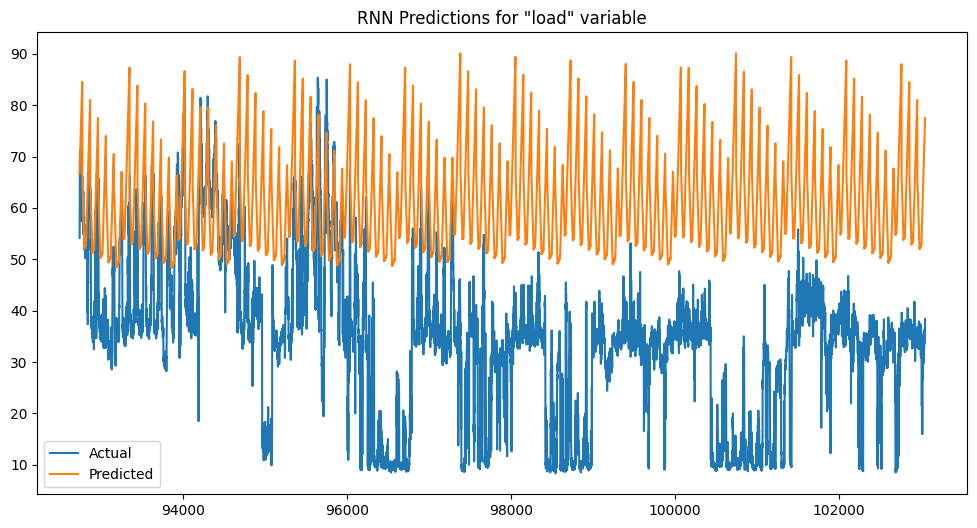

In [22]:
# Visualize results
plt.figure(figsize=(12, 6))
plt.title('RNN Predictions for "load" variable')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rnn_predictions, label='Predicted')
plt.legend()
plt.show()

In [23]:
# Calculate other performance metrics
mse = mean_squared_error(y_test, rnn_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rnn_predictions)
r2 = r2_score(y_test, rnn_predictions)

In [24]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 992.6626
Root Mean Squared Error (RMSE): 31.506548
Mean Absolute Error (MAE): 27.465965
R-squared (R^2): -3.3771988278113216
